<a href="https://colab.research.google.com/github/andygomzang/Machine-Learning/blob/main/R2-A10-S10/Reducci%C3%B3n_de_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Datos escalados (primeras 5 filas):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.31544

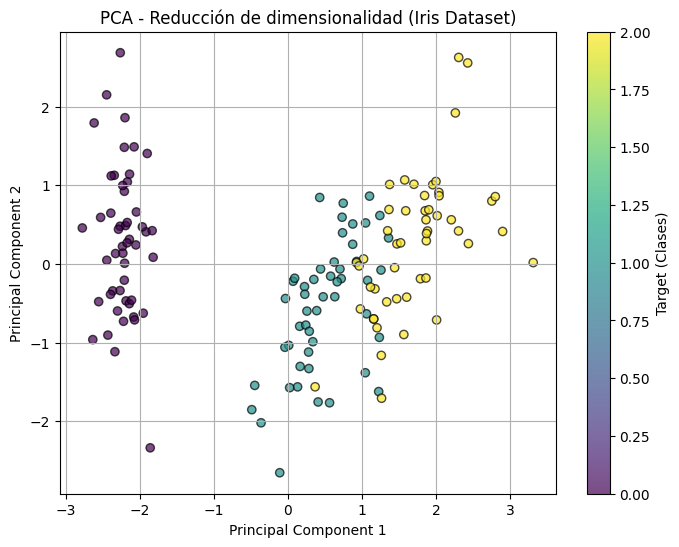


Resultados guardados en el archivo: pca_iris_results.csv


In [4]:

# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. Cargar el conjunto de datos Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Visualizar las primeras filas del dataset
print("Primeras filas del conjunto de datos:")
print(df.head())

# 2. Escalar los datos (normalización)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))

# Mostrar los datos escalados
print("\nDatos escalados (primeras 5 filas):")
print(pd.DataFrame(scaled_data, columns=data.feature_names).head())

# 3. Aplicar PCA
n_components = 2  # Reducir a 2 dimensiones
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(scaled_data)

# Convertir los componentes a un DataFrame
pca_df = pd.DataFrame(data=pca_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['target'] = df['target']

# Mostrar la varianza explicada por las componentes principales
explained_variance = pca.explained_variance_ratio_
print(f"\nVarianza explicada por cada componente principal: {explained_variance}")
print(f"Varianza total explicada: {np.sum(explained_variance)}")

# 4. Visualización de los resultados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['Principal Component 1'],
    pca_df['Principal Component 2'],
    c=pca_df['target'],
    cmap='viridis',
    edgecolor='k',
    alpha=0.7
)

# Agregar detalles al gráfico
plt.title('PCA - Reducción de dimensionalidad (Iris Dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Target (Clases)')
plt.grid(True)
plt.show()

# 5. Guardar resultados en un archivo CSV (opcional)
output_file = "pca_iris_results.csv"
pca_df.to_csv(output_file, index=False)
print(f"\nResultados guardados en el archivo: {output_file}")




Primeras filas del conjunto de datos:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.20601

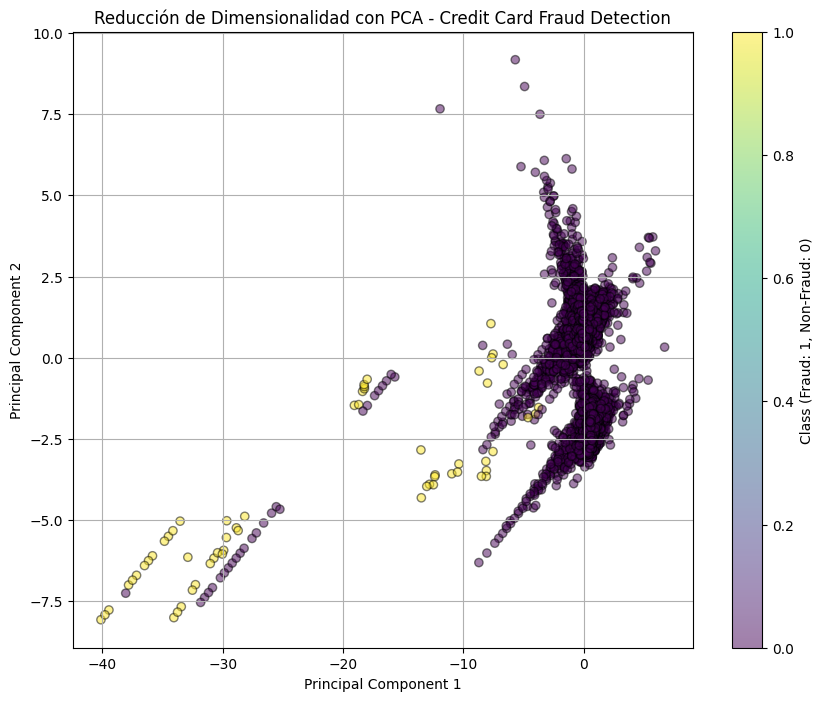


Resultados guardados en el archivo: pca_creditcard_results.csv


In [10]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Cargar el conjunto de datos
# Descargamos el conjunto de datos "Credit Card Fraud Detection" desde Kaggle o cargamos desde un archivo local.
# Asegúrate de subir el archivo "creditcard.csv" a tu entorno de Colab.
file_path = 'creditcard.csv'  # Ruta al archivo CSV
df = pd.read_csv(file_path)

# Inspeccionar los primeros registros
print("Primeras filas del conjunto de datos:")
print(df.head())

# Verificar las dimensiones del dataset
print(f"\nDimensiones del dataset: {df.shape}")

# 2. Preprocesamiento del conjunto de datos
# Separar características (X) y etiqueta (y)
X = df.drop(columns=['Time', 'Class'])  # Eliminamos la columna 'Time' y la clase para análisis
y = df['Class']  # La etiqueta indica si una transacción es fraudulenta o no

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto en entrenamiento y prueba para validación
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Aplicar PCA
n_components = 2  # Reducir a 2 dimensiones
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)

# Mostrar la varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f"\nVarianza explicada por las dos primeras componentes: {explained_variance}")
print(f"Varianza total explicada: {np.sum(explained_variance)}")

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Class'] = y_train.reset_index(drop=True)

# 4. Visualización de los resultados
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    pca_df['Principal Component 1'],
    pca_df['Principal Component 2'],
    c=pca_df['Class'],
    cmap='viridis',
    alpha=0.5,
    edgecolor='k'
)

plt.title('Reducción de Dimensionalidad con PCA - Credit Card Fraud Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class (Fraud: 1, Non-Fraud: 0)')
plt.grid(True)
plt.show()

# 5. Guardar resultados en un archivo CSV
output_file = "pca_creditcard_results.csv"
pca_df.to_csv(output_file, index=False)
print(f"\nResultados guardados en el archivo: {output_file}")
